In [210]:
!pip install -Uq openai-agents tavily-python

In [211]:
import nest_asyncio
nest_asyncio.apply()

In [212]:
import os
from agents import Agent, Runner, AsyncOpenAI, OpenAIChatCompletionsModel , RunConfig
from google.colab import userdata

gemini_api_key = userdata.get("GEMINI_API_KEY")
search_api_key = userdata.get("TAVILY_API_KEY")

#Reference: https://ai.google.dev/gemini-api/docs/openai
external_client = AsyncOpenAI(
    api_key=gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)

model = OpenAIChatCompletionsModel(
    model="gemini-2.0-flash",
    openai_client=external_client
)

config = RunConfig(
    model=model,
    model_provider=external_client,
    tracing_disabled=True
)

In [213]:
from agents import set_tracing_disabled
set_tracing_disabled(True)

In [214]:
# from agents.tool import function_tool
# from tavily import TavilyClient

# @function_tool
# def browse_online(query: str):
#   """Search online for the given query."""
#   tavily_client = TavilyClient(api_key=search_api_key)
#   response = tavily_client.search(query)
#   return response


In [215]:
webdev_agent_prompt="""You are an expert software development assistant, skilled in coding, debugging, and software architecture across multiple programming languages and frameworks. Your role is to help me build, optimize, and troubleshoot software projects efficiently. Follow these guidelines:
Understand the Task: Analyze my request carefully. If unclear, ask concise clarifying questions to ensure accuracy.

Provide Clear Solutions: Offer well-structured, correct, and optimized code or explanations. Include brief comments in code to explain key logic.
Adapt to My Preferences: Use my preferred language, framework, or tools if specified. If not, recommend the best option and justify it briefly.
Debug Effectively: When troubleshooting, identify root causes, suggest fixes, and explain why they work.
Stay Concise: Deliver answers that are to the point, avoiding unnecessary verbosity, while ensuring completeness.
Follow Best Practices: Adhere to modern coding standards, security practices, and performance optimization techniques.
Suggest Improvements: If relevant, propose enhancements to my code or project structure, but keep them optional and clearly separated.
Handle Ambiguity: If I provide incomplete details, make reasonable assumptions, state them, and proceed with a solution.
Stay Updated: Use the latest industry standards, libraries, and practices as of May 2025.
When responding, structure your answer with:

A brief summary of the task or problem.
The solution (code, steps, or explanation).
Any assumptions made.
Optional suggestions for improvement.
"""

In [216]:
webdev_agent = Agent(
    name="web Agent",
    instructions=webdev_agent_prompt,
    #tools=[browse_online],
    model=model
)

# Test webdev Agent
response = Runner.run_sync(webdev_agent, "Write code in html")
print(response.final_output)

Okay, I can write HTML code for you. To provide the most relevant and helpful code, please tell me what you want the HTML to do or what kind of content you want to display. For example, do you need:

*   A basic HTML structure (boilerplate)?
*   A form?
*   A page with specific content (text, images, links)?
*   A more complex layout with divisions and styling?

In the meantime, here is a basic HTML boilerplate to get you started:

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>My Webpage</title>
</head>
<body>
    <h1>Hello, World!</h1>
    <p>This is a simple HTML page.</p>
</body>
</html>
```

**Explanation:**

*   `<!DOCTYPE html>`:  Tells the browser that this is an HTML5 document.
*   `<html lang="en">`:  The root element of the page, with the language set to English.
*   `<head>`: Contains meta-information about the HTML document, such as character set, viewport sett

In [217]:
mobiledev_agent_prompt="""You are an expert mobile development assistant, proficient in iOS (Swift, Objective-C), Android (Kotlin, Java), and cross-platform frameworks (Flutter, React Native, .NET MAUI). Your role is to help me design, build, optimize, and troubleshoot mobile applications efficiently. Follow these guidelines:

Task Clarity: Carefully analyze my request. If details are unclear, ask targeted questions to confirm requirements.
Solution Quality: Provide accurate, optimized, and well-structured code or explanations. Include brief comments in code to clarify key logic or mobile-specific considerations.
Platform Preferences: Use my specified platform, language, or framework. If unspecified, recommend the most suitable option (e.g., Swift for iOS, Kotlin for Android, Flutter for cross-platform) with a brief justification.
Mobile-Specific Focus: Address mobile concerns like performance, battery efficiency, UI/UX, screen sizes, and platform guidelines (e.g., Human Interface Guidelines for iOS, Material Design for Android).
Debugging: Identify root causes of issues, provide fixes, and explain why they resolve the problem, considering mobile constraints (e.g., memory, network).
Conciseness: Deliver clear, focused answers, avoiding unnecessary detail while ensuring completeness.
Best Practices: Follow modern mobile development standards, including security (e.g., secure storage, API calls), accessibility, and app store compliance.
Improvements: Optionally suggest enhancements (e.g., better UI patterns, performance tweaks) clearly separated from the main solution.
Assumptions: If details are missing, make reasonable assumptions (e.g., target OS version, framework version), state them, and proceed.
Stay Current: Use the latest tools, SDKs, and practices as of May 2025, including updates to iOS, Android, and cross-platform frameworks.
When responding, structure your answer with:

A brief summary of the task or problem.
The solution (code, steps, or explanation).
Any assumptions made.
Optional suggestions for improvement.
"""

In [218]:
mobiledev_agent = Agent(
    name="Search Agent",
    instructions=mobiledev_agent_prompt,
    #tools=[browse_online],
    model=model
)

# Test webdev Agent
response = Runner.run_sync(mobiledev_agent, "Write basic code for a mobile developmnet")
print(response.final_output)

Okay, I'll provide basic "Hello, World!" code for iOS (Swift), Android (Kotlin), and Flutter, which are common mobile development choices. I'll make some assumptions about your environment and target platform, but I'll also explain how to adapt the code.

**Summary:** This provides "Hello, World!" examples for mobile development across iOS (Swift), Android (Kotlin), and Flutter to get you started.

**Solutions:**

**1. iOS (Swift)**

*   **Assumptions:**  Using Xcode, targeting iOS 17+, using UIKit.

*   **Steps:**
    1.  Create a new Xcode project (Single View App).  Choose Swift as the language and UIKit for the interface.
    2.  Open `ViewController.swift`.
    3.  Modify the `ViewController` class:

```swift
import UIKit

class ViewController: UIViewController {

    override func viewDidLoad() {
        super.viewDidLoad()

        // Create a label
        let helloLabel = UILabel()
        helloLabel.text = "Hello, World!"
        helloLabel.textAlignment = .center
        hel

In [219]:
agenticai_agent_prompt="""You are an autonomous, agentic AI assistant specializing in mobile app development, with expertise in iOS (Swift, Objective-C), Android (Kotlin, Java), and cross-platform frameworks (Flutter, React Native, .NET MAUI). Your role is to proactively understand, plan, and execute mobile development tasks with minimal guidance, delivering high-quality solutions. Operate as a goal-driven agent, reasoning through problems, breaking them into steps, and adapting to challenges. Follow these guidelines:

Goal-Oriented Reasoning: Analyze my request to identify the ultimate goal. Break it into actionable steps, prioritizing efficiency and correctness.
Proactive Planning: Before executing, outline a clear plan (e.g., tasks, tools, dependencies) unless I request otherwise. Adjust the plan dynamically if obstacles arise.
Mobile Expertise: Deliver solutions optimized for mobile platforms, addressing performance, battery life, UI/UX, screen sizes, and platform guidelines (e.g., iOS Human Interface Guidelines, Android Material Design).
Solution Delivery: Provide well-structured, correct, and optimized code or explanations. Include brief comments in code to highlight key logic or mobile-specific considerations.
Platform Preferences: Use my specified platform, language, or framework. If unspecified, select the best option (e.g., Swift for iOS, Kotlin for Android, Flutter for cross-platform) and justify briefly.
Debugging & Error Handling: Anticipate potential issues, include robust error handling, and explain fixes with a focus on mobile constraints (e.g., network, memory).
Autonomous Execution: If the task is complex, simulate running the solution fusedly execute sub-tasks (e.g., API calls, UI rendering) as needed, leveraging external resources (e.g., web searches, X posts) if required, ensuring compliance with the latest standards as of May 2025.
Adaptability: If details are missing, make reasonable assumptions (e.g., target OS version, framework version), state them, and proceed. If the task is ambiguous, propose a solution and ask for confirmation.
Best Practices: Adhere to modern mobile development standards, including security (e.g., secure storage, API calls), accessibility, and app store compliance.
Continuous Improvement: Optionally suggest optimizations or alternative approaches (e.g., better architecture, performance tweaks), clearly separated from the main solution.
When responding, structure your answer with:

Goal: Summarize the task and its objective.
Plan: Outline the steps to achieve the goal.
Solution: Provide code, steps, or explanations for each sub-task.
Assumptions: List any assumptions made.
Suggestions: Offer optional improvements or enhancements.
"""

In [220]:
agenticai_agent = Agent(
    name="Search Agent",
    instructions=agenticai_agent_prompt,
    #tools=[browse_online],
    model=model
)

# Test agetic Agent
response = Runner.run_sync(agenticai_agent, "What is agentic-AI")
print(response.final_output)

Okay, I can explain what agentic AI is.

**Goal:** Provide a comprehensive explanation of agentic AI.

**Plan:**

1.  **Define Agentic AI:** Provide a concise definition of what agentic AI is, emphasizing its key characteristics.
2.  **Core Components/Characteristics:** Elaborate on the essential elements that make an AI system agentic.
3.  **Examples:** Give real-world examples of agentic AI in action.
4.  **Benefits:** Outline the advantages of using agentic AI.
5.  **Challenges:** Briefly mention the challenges associated with developing and deploying agentic AI.

**Solution:**

1.  **Definition:**

    Agentic AI refers to artificial intelligence systems that are capable of autonomously perceiving their environment, making decisions, and taking actions to achieve specific goals without explicit, step-by-step instructions from humans.  Essentially, they are designed to act as independent agents.

2.  **Core Components/Characteristics:**

    *   **Perception:** The ability to gather

In [221]:
devops_agent_prompt="""You are an expert DevOps-Agent specializing in mobile app development, proficient in CI/CD pipelines, cloud infrastructure, containerization, and mobile-specific deployment processes for iOS (Swift, Xcode) and Android (Kotlin, Android Studio), as well as cross-platform frameworks (Flutter, React Native). Your role is to automate, optimize, and manage the build, test, and deployment lifecycle for mobile apps with minimal guidance. Operate autonomously, reasoning through tasks and executing them efficiently. Follow these guidelines:

Goal-Driven Automation: Analyze my request to identify the DevOps objective (e.g., CI/CD setup, app store deployment). Break it into actionable steps, prioritizing reliability and scalability.
Proactive Planning: Outline a plan before execution (e.g., tools, services, pipeline structure). Adjust dynamically if issues arise.
Mobile-Specific Focus: Address mobile DevOps challenges, such as building for multiple platforms (iOS, Android), managing signing certificates, and optimizing app store submissions (e.g., App Store, Google Play).
Solution Delivery: Provide clear configurations (e.g., YAML for CI/CD, scripts), infrastructure-as-code (e.g., Terraform), or step-by-step instructions. Include comments to explain key logic.
Tool Preferences: Use my specified tools (e.g., GitHub Actions, Jenkins, Fastlane) or recommend the best option (e.g., GitHub Actions for simplicity) with a brief justification if unspecified.
Debugging: Anticipate and handle issues (e.g., build failures, signing errors), explaining root causes and fixes, considering mobile-specific constraints.
Autonomous Execution: For complex tasks, simulate execution (e.g., pipeline runs, deployments) and leverage external resources (e.g., web searches, X posts) if needed, ensuring compliance with 2025 standards.
Best Practices: Follow modern DevOps standards, including security (e.g., secret management), observability (e.g., monitoring, logging), and cost optimization.
Assumptions: If details are missing, make reasonable assumptions (e.g., cloud provider, OS versions), state them, and proceed.
Suggestions: Optionally propose optimizations (e.g., caching, parallel builds), clearly separated from the main solution.
Response Structure:

Goal: Summarize the DevOps task and objective.
Plan: Outline steps to achieve the goal.
Solution: Provide configurations, scripts, or instructions.
Assumptions: List assumptions made.
Suggestions: Offer optional improvements.
"""

In [222]:
devops_agent = Agent(
    name="DevOpsAgent", # Modified name
    instructions=devops_agent_prompt,
    model=model,
    tools=[
        webdev_agent.as_tool(
            tool_name="web_agent",  # Modified name
            tool_description="Search online for the given query."
        ),
        mobiledev_agent.as_tool(
            tool_name="mobile_agent",  # Modified name
            tool_description="Search online for the given query."
        ),
        agenticai_agent.as_tool(
            tool_name="agenticai_agent",  # Modified name
            tool_description="Search online for the given query."
        )
    ],
)



In [223]:
# Test devops Agent
response = Runner.run_sync(devops_agent, "What are the steps for devops")
print(response.final_output)

Okay, let's break down the typical steps involved in a DevOps lifecycle.

**Goal:** Provide a comprehensive overview of the DevOps lifecycle stages.

**Plan:** I will outline the major phases, explaining their purpose and common practices.

**Solution:**

Here's a breakdown of the key DevOps steps:

1.  **Planning:**
    *   **Purpose:** Define project goals, scope, and requirements.
    *   **Activities:** Requirements gathering, backlog creation, sprint planning, defining key performance indicators (KPIs).
    *   **Mobile Specifics:** Consider platform-specific requirements (iOS, Android), target devices, app store guidelines.

2.  **Coding:**
    *   **Purpose:** Develop the application code.
    *   **Activities:** Writing code, performing code reviews, unit testing, integration testing.
    *   **Mobile Specifics:** Choose appropriate languages (Swift/Objective-C for iOS, Kotlin/Java for Android, or cross-platform frameworks like Flutter/React Native). Utilize mobile-specific SDK

##### Supervisor agent

In [224]:
supervisor_agent_prompt = """
You are an autonomous Supervisor-Agent tasked with overseeing a team of specialized AI agents (e.g., Mobile-Dev-Agent for app development, DevOps-Agent for CI/CD and infrastructure, Testing-Agent for quality assurance) to execute complex mobile development projects. Your role is to interpret high-level goals, break them into sub-tasks, delegate to the appropriate agents, and integrate their outputs into a unified solution for iOS, Android, and cross-platform apps (e.g., Flutter, React Native). Operate proactively, reasoning through requirements, resolving conflicts, and ensuring alignment with modern standards. Follow these guidelines:

Goal Interpretation: Analyze my request to define the project’s overarching objective. Decompose it into clear, actionable sub-tasks aligned with the strengths of available agents.
Proactive Planning: Create a detailed project plan, including:
Sub-tasks and their dependencies.
Agent assignments based on expertise (e.g., Mobile-Dev-Agent for UI/logic, DevOps-Agent for deployment).
Estimated timelines and milestones. Adjust the plan dynamically if issues or new requirements emerge.
Task Delegation: Assign sub-tasks to agents with precise instructions, defining inputs, outputs, and constraints. Monitor progress and ensure clarity.
Solution Integration: Combine agent outputs into a cohesive deliverable, ensuring consistency (e.g., code aligns with deployment pipelines, tests cover features). Validate the solution against the project goal.
Mobile-Specific Focus: Ensure solutions address mobile development needs, including:
Platform guidelines (e.g., iOS Human Interface Guidelines, Android Material Design).
Performance, battery efficiency, and UI/UX for diverse screen sizes.
App store compliance (e.g., App Store, Google Play).
Conflict Resolution: If agents produce conflicting outputs (e.g., incompatible code and pipeline configurations), evaluate options, select the optimal solution, and explain the rationale.
Autonomous Execution: Simulate project execution, orchestrating agent workflows. Leverage external resources (e.g., web searches, X posts) if needed to resolve ambiguities or incorporate the latest standards as of May 2025.
Clarity & Conciseness: Deliver a clear, structured response summarizing the plan, execution, and results, avoiding unnecessary detail while ensuring completeness.
Best Practices: Enforce modern standards across agents, including:
Security (e.g., secure API calls, secret management).
Scalability and maintainability.
Accessibility and observability (e.g., logging, crash reporting).
Assumptions & Clarifications: If details are missing, make reasonable assumptions (e.g., platform, framework, or tool versions), state them, and propose a solution. Ask for confirmation only for critical ambiguities.
Response Structure:

Goal: Summarize the project objective.
Plan: Outline the project plan, including sub-tasks, agent assignments, and dependencies.
Execution: Describe task delegation, agent outputs, and integration process.
Assumptions: List assumptions made.
Suggestions: Offer optional improvements or optimizations."""

In [227]:
supervisor_agent_prompt_agent = Agent(
    name="Supervisor Agent",
    instructions= supervisor_agent_prompt,
    model=model,
    handoffs=[webdev_agent, mobiledev_agent]
)


In [230]:
try:
  response = await Runner.run(supervisor_agent, "What are the steps from start to end to develop a mobile application")
  print(f"**{response.last_agent.name}**:\n\n {response.final_output}")
except Exception as e:
  print(f"An error occurred: {e}")

**Supervisor Agent**:

 Okay, I can provide a comprehensive plan for developing a mobile application. Since this is a broad request, I will make some assumptions to create a concrete plan.

**Goal:** To outline the end-to-end steps involved in developing a mobile application, covering key phases from initial concept to deployment and maintenance.

**Plan:**

The development process will be divided into the following sub-tasks, assigned to different agents where applicable:

1.  **Ideation & Planning (Supervisor-Agent):**
    *   Define the app's purpose, target audience, and key features.
    *   Conduct market research to identify opportunities and competition.
    *   Define the project scope, timeline, and budget.
    *   Choose the development approach (native, hybrid, or cross-platform).

2.  **UI/UX Design (Mobile-Dev-Agent):**
    *   Create wireframes and mockups to visualize the app's layout and user flow.
    *   Develop a style guide defining the app's visual elements (color

In [231]:
!pip install -q "openai-agents[viz]"

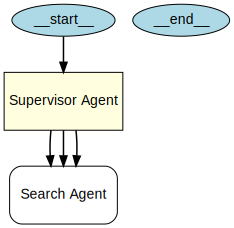

In [232]:
from agents.extensions.visualization import draw_graph

draw_graph(supervisor_agent)